In [ ]:
# Install necessary packages (if not already installed in Colab)
!pip install xgboost seaborn

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing machine learning libraries
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score


In [ ]:
# Load the CSV files into DataFrames
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [ ]:
classes = y_test['Diagnosis'].unique()
classes = sorted(classes)

## **Random Forest**

In [ ]:
model1 = RandomForestClassifier(max_depth=10, n_estimators=150, oob_score=True)
model1.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=10, n_estimators=150, oob_score=True)

In [ ]:
model1.score(X_test, y_test)

0.965

In [ ]:
y_pred1 = pd.DataFrame(model1.predict(X_test), index=y_test.index, columns=['Diagnosis'])
y_pred1.head()

,Diagnosis
0,COPD
1,Healthy
2,COPD
3,Healthy
4,Healthy


In [ ]:
print(classification_report(y_test, y_pred1))

                precision    recall  f1-score   support

Bronchiectasis       1.00      1.00      1.00        27
 Bronchiolitis       0.94      0.94      0.94        18
          COPD       1.00      0.95      0.97        79
       Healthy       0.93      0.97      0.95        29
     Pneumonia       0.94      0.97      0.95        31
          URTI       0.89      1.00      0.94        16

      accuracy                           0.96       200
     macro avg       0.95      0.97      0.96       200
  weighted avg       0.97      0.96      0.97       200



In [ ]:
print('Precision =', precision_score(y_test, y_pred1, average='weighted'))
print('Recall =', recall_score(y_test, y_pred1, average='weighted'))
print('F1-Score =', f1_score(y_test, y_pred1, average='weighted'))

Precision = 0.9667569444444445
Recall = 0.965
F1-Score = 0.9652805436504339


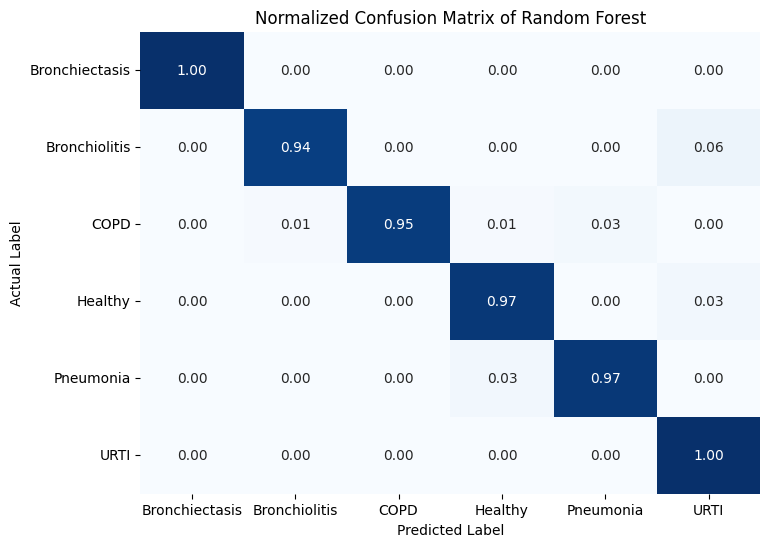

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred1)
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Normalized Confusion Matrix of Random Forest')
plt.show()

In [ ]:
model1 = RandomForestClassifier(max_depth=10, n_estimators=150, oob_score=True)
np.mean(cross_val_score(model1, pd.concat([X_train, X_test], axis=0), pd.concat([y_train, y_test], axis=0).values.ravel(), cv=5, scoring='accuracy'))

0.9588743718592966

## **Gradient Boost**

In [ ]:
model2 = GradientBoostingClassifier(max_depth=8, max_features='sqrt', n_estimators=200)
model2.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(max_depth=8, max_features='sqrt', n_estimators=200)

In [ ]:
model2.score(X_test, y_test)

0.98

In [ ]:
y_pred2 = pd.DataFrame(model2.predict(X_test), index=y_test.index, columns=['Diagnosis'])
y_pred2.head()

,Diagnosis
0,COPD
1,Healthy
2,COPD
3,Pneumonia
4,Healthy


In [ ]:
print(classification_report(y_test, y_pred2))

                precision    recall  f1-score   support

Bronchiectasis       1.00      1.00      1.00        27
 Bronchiolitis       1.00      1.00      1.00        18
          COPD       1.00      0.95      0.97        79
       Healthy       1.00      1.00      1.00        29
     Pneumonia       0.89      1.00      0.94        31
          URTI       1.00      1.00      1.00        16

      accuracy                           0.98       200
     macro avg       0.98      0.99      0.99       200
  weighted avg       0.98      0.98      0.98       200



In [ ]:
print('Precision =', precision_score(y_test, y_pred2, average='weighted'))
print('Recall =', recall_score(y_test, y_pred2, average='weighted'))
print('F1-Score =', f1_score(y_test, y_pred2, average='weighted'))

Precision = 0.9822857142857143
Recall = 0.98
F1-Score = 0.9803463203463204


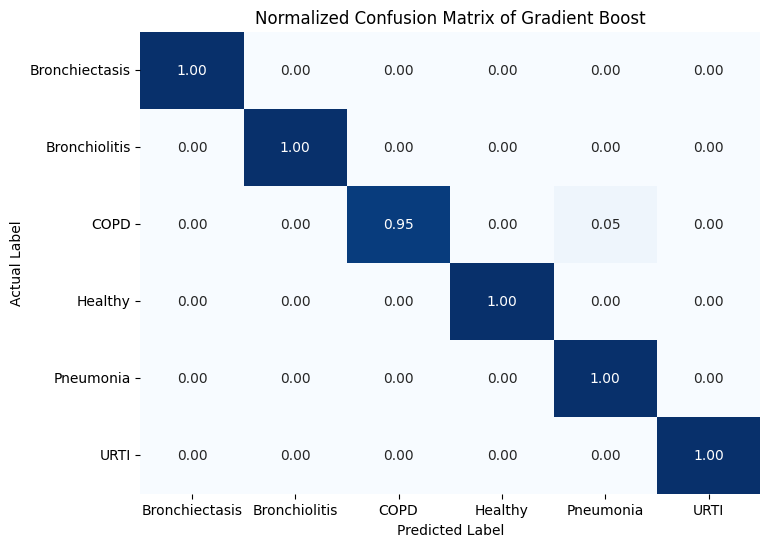

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred2)
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Normalized Confusion Matrix of Gradient Boost')
plt.show()

In [ ]:
model2 = GradientBoostingClassifier(max_depth=8, max_features='sqrt', n_estimators=200)
np.mean(cross_val_score(model2, pd.concat([X_train, X_test], axis=0), pd.concat([y_train, y_test], axis=0).values.ravel(), cv=5, scoring='accuracy'))

0.9649045226130653

# **XG Boost**

In [ ]:
# Encoding the Labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train.values.ravel())
y_test_encoded = le.transform(y_test.values.ravel())

In [ ]:
!pip uninstall -y xgboost
!pip install xgboost --upgrade

Found existing installation: xgboost 2.1.3
Uninstalling xgboost-2.1.3:
  Successfully uninstalled xgboost-2.1.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.0 MB/s eta 0:00:00


In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
from xgboost import XGBClassifier

model3 = XGBClassifier(subsample=1, reg_alpha=0, n_estimators=300, max_depth=6, learning_rate=0.1, gamma=0, colsample_bytree=0.6)
model3.fit(X_train, y_train_encoded)

# Evaluate the model
model3.score(X_test, y_test_encoded)

0.985

In [ ]:
y_pred3 = pd.DataFrame(model3.predict(X_test), index=y_test.index, columns=['Diagnosis'])
y_pred3.head()

,Diagnosis
0,2
1,3
2,2
3,2
4,3


In [ ]:
print(classification_report(y_test_encoded, y_pred3, target_names=le.classes_))

                precision    recall  f1-score   support

Bronchiectasis       1.00      1.00      1.00        27
 Bronchiolitis       1.00      1.00      1.00        18
          COPD       1.00      0.96      0.98        79
       Healthy       1.00      1.00      1.00        29
     Pneumonia       0.91      1.00      0.95        31
          URTI       1.00      1.00      1.00        16

      accuracy                           0.98       200
     macro avg       0.99      0.99      0.99       200
  weighted avg       0.99      0.98      0.99       200



In [ ]:
print('Precision =', precision_score(y_test_encoded, y_pred3, average='weighted'))
print('Recall =', recall_score(y_test_encoded, y_pred3, average='weighted'))
print('F1-Score =', f1_score(y_test_encoded, y_pred3, average='weighted'))

Precision = 0.9863235294117646
Recall = 0.985
F1-Score = 0.9852009925558312


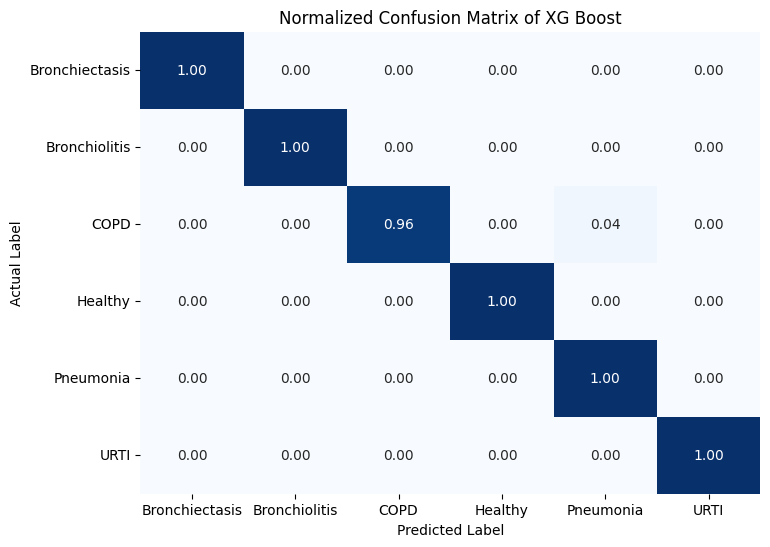

In [ ]:
conf_matrix = confusion_matrix(y_test_encoded, y_pred3)
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap='Blues', cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Normalized Confusion Matrix of XG Boost')
plt.show()

In [ ]:
from xgboost import cv, DMatrix

# Combine data
X_combined = pd.concat([X_train, X_test], axis=0)
y_combined = np.concatenate([y_train_encoded, y_test_encoded])

# Create DMatrix for XGBoost
dtrain = DMatrix(X_combined, label=y_combined)

# Define parameters for XGBoost
params = {
    'subsample': 1,
    'reg_alpha': 0,
    'n_estimators': 300,
    'max_depth': 6,
    'learning_rate': 0.1,
    'gamma': 0,
    'colsample_bytree': 0.6,
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y_combined))
}

# Perform Cross-Validation
cv_results = cv(params, dtrain, num_boost_round=300, nfold=5, metrics={'merror'}, seed=42)

# Accuracy
accuracy = 1 - cv_results['test-merror-mean'].min()
print(f"Cross-Validation Accuracy: {accuracy:.4f}")

Cross-Validation Accuracy: 0.9679
